In [20]:
import numpy as np
import pandas as pd
import sympy as sym
from sympy import Symbol
from scipy.optimize import fsolve
import matplotlib.ticker as mticker

In [2]:
def BM(x, E0, B0, V0, B0p):
    return E0+(9/16)*V0*B0*(B0p*((V0/x)**(2/3)-1)**3+((V0/x)**(2/3)-1)**2*(6-4*(V0/x)**(2/3)))

In [3]:
x=Symbol('x')
E0=Symbol('E0')
B0=Symbol('B0')
V0=Symbol('V0')
B0p=Symbol('B0p')
f=BM(x,E0,B0,V0,B0p)

In [4]:
dBM=f.diff(x)

In [5]:
f

0.5625*B0*V0*(B0p*((V0/x)**0.666666666666667 - 1)**3 + (-4*(V0/x)**0.666666666666667 + 6)*((V0/x)**0.666666666666667 - 1)**2) + E0

In [6]:
dBM

0.5625*B0*V0*(-2.0*B0p*(V0/x)**0.666666666666667*((V0/x)**0.666666666666667 - 1)**2/x - 1.33333333333333*(V0/x)**0.666666666666667*(-4*(V0/x)**0.666666666666667 + 6)*((V0/x)**0.666666666666667 - 1)/x + 2.66666666666667*(V0/x)**0.666666666666667*((V0/x)**0.666666666666667 - 1)**2/x)

In [70]:
def der_BM(x, B0, V0, B0p):
    return 0.5625*B0*V0*(-2.0*B0p*(V0/x)**0.666666666666667*((V0/x)**0.666666666666667 - 1)**2/x - 1.33333333333333*(V0/x)**0.666666666666667*(-4*(V0/x)**0.666666666666667 + 6)*((V0/x)**0.666666666666667 - 1)/x + 2.66666666666667*(V0/x)**0.666666666666667*((V0/x)**0.666666666666667 - 1)**2/x)

In [8]:
from scipy import optimize
import matplotlib.pyplot as plt
import sympy as sym

In [9]:
cols=['ALAT','Volumen','Energía total']

In [44]:
diamante=pd.read_csv("diamante/conv_ALAT/volEtot.dat",sep='\s+',header=None)
diamante.columns=cols
Vdiam=diamante["Volumen"]
Ediam=diamante["Energía total"]
param_diam, cov_diam = optimize.curve_fit(BM, Vdiam, Ediam,p0=[1,1,15,1])

In [45]:
beta_tin=pd.read_csv("beta-tin/volEtot.dat",sep='\s+',header=None)
beta_tin.columns=cols
Vbeta=beta_tin["Volumen"][:-2]
Ebeta=beta_tin["Energía total"][:-2]
param_beta, cov_beta = optimize.curve_fit(BM, Vbeta, Ebeta,p0=[1,1,15,1])

In [61]:
npts=100000
xfit=np.linspace(5,30,npts)
diam_fit=BM(xfit,param_diam[0],param_diam[1],param_diam[2],param_diam[3])
beta_fit=BM(xfit,param_beta[0],param_beta[1],param_beta[2],param_beta[3])

In [77]:
def tang_diam(x,x0):
    a=der_BM(x0,param_diam[1],param_diam[2],param_diam[3])
    b=BM(x0,param_diam[0],param_diam[1],param_diam[2],param_diam[3])-a*x0
    return a*x+b

In [110]:
def tang_beta(x,x0):
    a=der_BM(x0,param_beta[1],param_beta[2],param_beta[3])
    b=BM(x0,param_beta[0],param_beta[1],param_beta[2],param_beta[3])-a*x0
    return a*x+b

In [66]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 22})

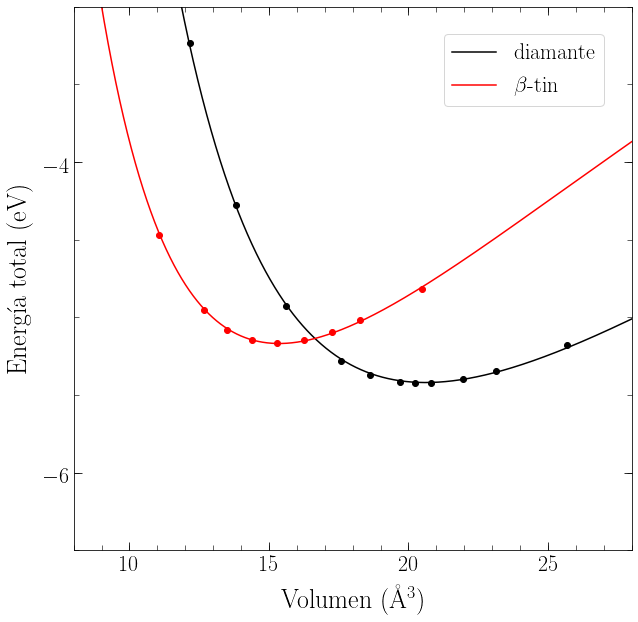

In [159]:
fig=plt.figure(figsize=(10,10))
ax=plt.subplot(111)
plt.plot(Vdiam,Ediam,'ko',label='')
plt.plot(Vbeta,Ebeta,'ro',label='')
plt.plot(xfit,diam_fit,'k',linestyle='solid',label='diamante')
plt.plot(xfit,beta_fit,'r',linestyle='solid',label=r'$\beta$-tin')
plt.legend(bbox_to_anchor=(0.95, 0.95), loc='upper right', borderaxespad=0.)
plt.ylabel('Energía total (eV)',fontsize=26,labelpad=10)
plt.xlabel(r'Volumen (\AA$^3$)',fontsize=26,labelpad=10)
ax.xaxis.set_major_locator(mticker.MultipleLocator(5));
ax.xaxis.set_minor_locator(mticker.MultipleLocator(1));
ax.yaxis.set_major_locator(mticker.MultipleLocator(2));
ax.yaxis.set_minor_locator(mticker.MultipleLocator(0.5));
ax.tick_params(direction='in',which='major',length=8,bottom=True, top=True, left=True, right=True);
ax.tick_params(direction='in',which='minor',length=5,bottom=True, top=True, left=True, right=True);
plt.ylim(-6.5,-3)
plt.xlim(8,28)
plt.show()

In [138]:
from scipy.optimize import least_squares
from scipy.optimize import fsolve

In [147]:
def equations(p):
    x1, x2 = p
    f2 = BM(x2, param_diam[0], param_diam[1], param_diam[2], param_diam[3])
    f1 = BM(x1, param_beta[0], param_beta[1], param_beta[2], param_beta[3])
    df2 = der_BM(x2, param_diam[1], param_diam[2], param_diam[3])
    df1 = der_BM(x1, param_beta[1], param_beta[2], param_beta[3])
    E1 = df1-df2
    E2 = df1-(f2-f1)/(x2-x1)
    return (E1, E2)

In [161]:
x1,x2=fsolve(equations,(14,19),xtol=1.0e-12)

In [174]:
print(x1)
print(x2)

14.386685274121632
18.961272794828215


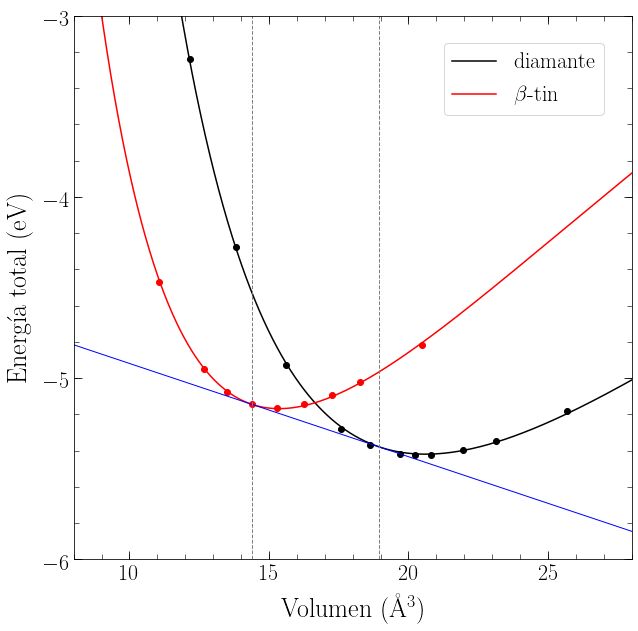

In [173]:
fig=plt.figure(figsize=(10,10))
ax=plt.subplot(111)
plt.plot(Vdiam,Ediam,'ko',label='')
plt.plot(Vbeta,Ebeta,'ro',label='')
plt.plot(xfit,diam_fit,'k',linestyle='solid',label='diamante')
plt.plot(xfit,beta_fit,'r',linestyle='solid',label=r'$\beta$-tin')
#plt.plot(xfit,tang_diam(xfit,x2),'g',linestyle='solid',label='')
plt.plot(xfit,tang_beta(xfit,x1),'b',linestyle='solid',linewidth=1,label='')
plt.legend(bbox_to_anchor=(0.95, 0.95), loc='upper right', borderaxespad=0.)
plt.ylabel('Energía total (eV)',fontsize=26,labelpad=10)
plt.xlabel(r'Volumen (\AA$^3$)',fontsize=26,labelpad=10)
ax.xaxis.set_major_locator(mticker.MultipleLocator(5));
ax.xaxis.set_minor_locator(mticker.MultipleLocator(1));
ax.yaxis.set_major_locator(mticker.MultipleLocator(1));
ax.yaxis.set_minor_locator(mticker.MultipleLocator(0.2));
ax.tick_params(direction='in',which='major',length=8,bottom=True, top=True, left=True, right=True);
ax.tick_params(direction='in',which='minor',length=5,bottom=True, top=True, left=True, right=True);
plt.ylim(-6,-3)
plt.xlim(8,28)
ax.axvline(x=x1,c='gray',linestyle='dashed',linewidth=1)
ax.axvline(x=x2,c='gray',linestyle='dashed',linewidth=1)

plt.savefig("punto6.eps",bbox_inches='tight')
plt.show()

In [163]:
a_diam=der_BM(x2,param_diam[1],param_diam[2],param_diam[3])
a_beta=der_BM(x1,param_beta[1],param_beta[2],param_beta[3])
print(a_diam)
print(a_beta)

-0.051457043467334436
-0.051457043467334436


In [177]:
-a_diam*1.60218E-19/(1.0E-10)**3

8244344590.249388